## Support vector classifier

In [2]:
#load the libries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
## make classfiication data
from sklearn.datasets import make_classification

In [20]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

<AxesSubplot:xlabel='0', ylabel='1'>

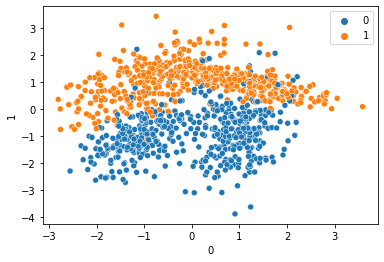

In [21]:
sns.scatterplot(pd.DataFrame(X)[0],pd.DataFrame(X)[1],hue=y)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## SVM classifier

In [24]:
from sklearn.svm import SVC

In [26]:
svc=SVC(kernel='linear')

In [27]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [28]:
svc.intercept_

array([-0.3221532])

In [29]:
svc.coef_

array([[-0.31558537,  2.11420867]])

In [30]:
## predict the test
y_pred=svc.predict(X_test)

## accuracy check

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [34]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89       147
           1       0.95      0.86      0.91       183

    accuracy                           0.90       330
   macro avg       0.90      0.90      0.90       330
weighted avg       0.91      0.90      0.90       330

[[139   8]
 [ 25 158]]
0.9


## hyper parameter tuning

In [52]:
parameter={
    'kernel' : ('linear', 'poly', 'rbf'),
    'C':[0.1,10,100,1000],
    'gamma' : ('scale', 'auto')
}
parameter

{'kernel': ('linear', 'poly', 'rbf'),
 'C': [0.1, 10, 100, 1000],
 'gamma': ('scale', 'auto')}

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
Svc_cv=SVC()

In [55]:
gv=GridSearchCV(Svc_cv,param_grid=parameter,cv=5,verbose=3)

In [56]:
gv.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.903 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.955 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.896 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.888 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.918 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.888 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.925 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.888 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.858 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.940 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.910 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 10, 100, 1000], 'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'poly', 'rbf')},
             verbose=3)

In [58]:
gv.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

In [59]:
svc_best=SVC(C= 10, gamma='auto', kernel= 'rbf')

In [60]:
svc_best.fit(X_train,y_train)

SVC(C=10, gamma='auto')

In [62]:
y_predbest=svc_best.predict(X_test)

In [63]:
print(classification_report(y_test,y_predbest))
print(confusion_matrix(y_test,y_predbest))
print(accuracy_score(y_test,y_predbest))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       147
           1       0.96      0.96      0.96       183

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330

[[139   8]
 [  7 176]]
0.9545454545454546
